# Spam SMS Detection

### Vonteri Varshith Reddy

### Imports

In [13]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt




### Loading the Dataset

In [14]:
# Load the dataset
delimiter = ','
data = pd.read_csv('./spam.csv', delimiter=delimiter, encoding='latin-1')
data.columns = ['label', 'message','useless1','useless2','useless3']


### Preprocessing the data

In [15]:
# Removing punctuation -> space . ',', '.'  and converting the text to lowercase 

data['message'] = data['message'].str.replace('[^\w\s]', '')  
data['message'] = data['message'].str.lower()



/tmp/ipykernel_21660/732619995.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['message'] = data['message'].str.replace('[^\w\s]', '')


### Vectorizing the data using TF-IDF vectorizer

In [16]:
# Vectorizing Using TF-IDF vectorizer
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(data['message'])
y = data['label']

# Test-Train Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



### Fitting the training data to MultiNomial Naive Bayes Model

In [17]:
# Instantiating Naive Bayes Model
NB = MultinomialNB()
NB.fit(X_train, y_train)


MultinomialNB()

### Train Accuracy

In [18]:
# Evaluation on training data
y_train_pred = NB.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_accuracy = train_accuracy*100
print(f"Training Accuracy(%): {train_accuracy:.6f}")



Training Accuracy(%): 97.778775


### Test Accuracy

In [19]:
# Evaluation on Testing Data
y_test_pred = NB.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_accuracy = test_accuracy*100
print(f"Test Accuracy(%): {test_accuracy:.6f}")



Test Accuracy(%): 96.681614


### Evaluation Report of test data

In [20]:
# Evaluation metrics of train data (Precision, Accuracy, Recall, f1-score, support)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      3860
        spam       1.00      0.83      0.91       597

    accuracy                           0.98      4457
   macro avg       0.99      0.92      0.95      4457
weighted avg       0.98      0.98      0.98      4457



In [21]:
# Evaluation metrics of test data (Precision, Accuracy, Recall, f1-score, support)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



### Confusion Matrix

#### (i) Train Data

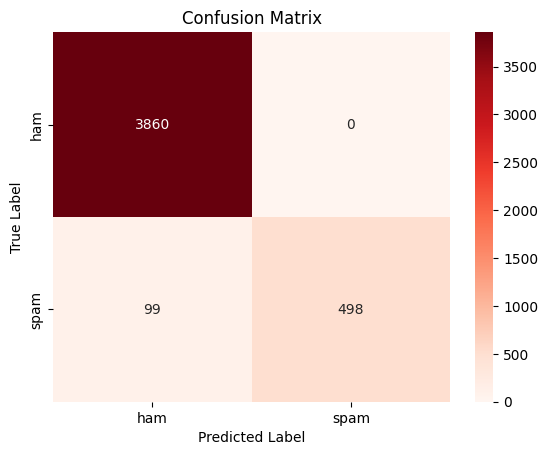

In [22]:
# Confusion matrix
conf_matrix = confusion_matrix(y_train, y_train_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', 
            xticklabels=NB.classes_, yticklabels=NB.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### (ii) Test Data

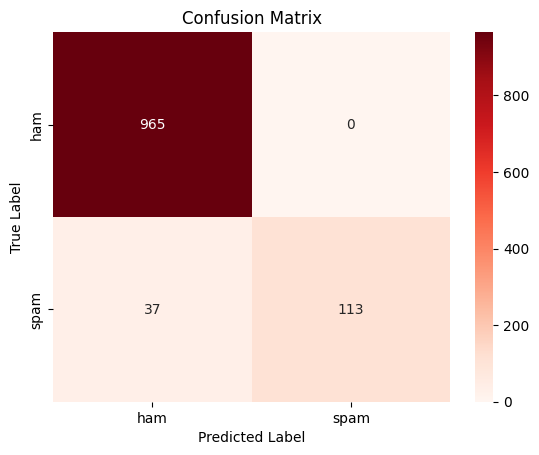

In [23]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', 
            xticklabels=NB.classes_, yticklabels=NB.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()